In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
np.random.seed(1024)

In [126]:
students = pd.read_csv('stud_math.xls')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Описание датасета
##### 1 school — аббревиатура школы, в которой учится ученик

##### 2 sex — пол ученика ('F' - женский, 'M' - мужской)

##### 3 age — возраст ученика (от 15 до 22)

##### 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

##### 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

##### 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

##### 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

##### 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

##### 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

##### 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

##### 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

##### 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

##### 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

##### 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

##### 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

##### 16 schoolsup — дополнительная образовательная поддержка (yes или no)

##### 17 famsup — семейная образовательная поддержка (yes или no)

##### 18 paid — дополнительные платные занятия по математике (yes или no)

##### 19 activities — дополнительные внеучебные занятия (yes или no)

##### 20 nursery — посещал детский сад (yes или no)

##### 21 higher — хочет получить высшее образование (yes или no)

##### 22 internet — наличие интернета дома (yes или no)

##### 23 romantic — в романтических отношениях (yes или no)

##### 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

##### 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

##### 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

##### 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

##### 28 absences — количество пропущенных занятий

##### 29 score — баллы по госэкзамену по математике

In [127]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Цель задачи - предсказание балла по госэкзамену по математике.
### Анализ целевой переменной

Пропущенные значения

In [128]:
students.score.isnull().sum()

6

In [129]:
students.score.value_counts(dropna=False)

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
NaN       6
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Как видно, много студентов сдали тест на 0, будем считать это плохим уровнем подготовки по математике. 
6 пропущенных значений - скорее всего студенты не смогли прийти на экзамен. Заменить такие значения логично средним или медианой.

In [130]:
students.score.fillna(students.score.mean(), inplace=True)
# students = students.dropna(subset=['score'])
# students = students.drop(students[students.score==0].index)

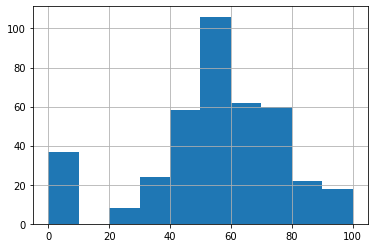

In [131]:
students.score.hist()

In [132]:
students.score.isnull().sum()

0

## Обработка признаков

In [133]:
def get_stat_diff(stat_df: pd.DataFrame, column:str, target: str):
    """
    Анализ статистической значимости тестом Стьюдента
    """
    df = stat_df.dropna(subset=[column])
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    found = False
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], target], 
                        df.loc[df.loc[:, column] == comb[1], target]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            found = True
            break
    if not found:
        print(f'Статистически значимые для {column} различия не найдены.')

In [134]:
for col in students.columns:
    get_stat_diff(students, col, 'score')

Статистически значимые для school различия не найдены.
Статистически значимые для sex различия не найдены.
Статистически значимые для age различия не найдены.
Найдены статистически значимые различия для колонки address
Статистически значимые для famsize различия не найдены.
Статистически значимые для Pstatus различия не найдены.
Найдены статистически значимые различия для колонки Medu
Статистически значимые для Fedu различия не найдены.
Найдены статистически значимые различия для колонки Mjob
Статистически значимые для Fjob различия не найдены.
Статистически значимые для reason различия не найдены.
Статистически значимые для guardian различия не найдены.
Статистически значимые для traveltime различия не найдены.
Статистически значимые для studytime различия не найдены.

C:\Users\kirill.n.cherkasov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\kirill.n.cherkasov\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kirill.n.cherkasov\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\kirill.n.cherkasov\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\kirill.n.cherkasov\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)



Найдены статистически значимые различия для колонки failures
Статистически значимые для schoolsup различия не найдены.
Статистически значимые для famsup различия не найдены.
Статистически значимые для paid различия не найдены.
Статистически значимые для activities различия не найдены.
Статистически значимые для nursery различия не найдены.
Статистически значимые для studytime, granular различия не найдены.
Найдены статистически значимые различия для колонки higher
Статистически значимые для internet различия не найдены.
Найдены статистически значимые различия для колонки romantic
Статистически значимые для famrel различия не найдены.
Статистически значимые для freetime различия не найдены.
Найдены статистически значимые различия для колонки goout
Статистически значимые для health различия не найдены.
Статистически значимые для absences различия не найдены.
Найдены статистически значимые различия для колонки score


In [135]:
students.school.value_counts(dropna=False)

GP    349
MS     46
Name: school, dtype: int64

Школа - бинарный категориальный признак. Пропущенных значений нет, оставляем как есть.

### Sex

In [136]:
students.sex.value_counts(dropna=False)

F    208
M    187
Name: sex, dtype: int64

### School

С полом - аналогичная ситуация что и со школами.

### Age

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

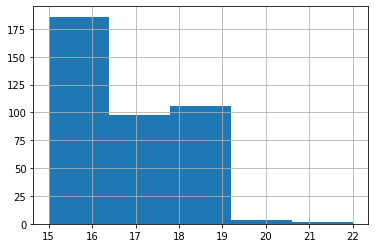

In [137]:
students.age.hist(bins=5)
students.age.describe()
students.age.value_counts()

Переменную возраст будем считать количественной. Как видно, в ней есть выбросы

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


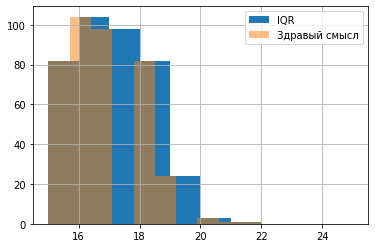

In [138]:
median = students.age.median()
IQR = students.age.quantile(0.75) - students.age.quantile(0.25)
perc25 = students.age.quantile(0.25)
perc75 = students.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.age.loc[students.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10
                                                                                              , range = (15, 25), 
                                                                                             label = 'IQR')
students.age.loc[students.age <= 100].hist(alpha = 0.5, bins = 10, range = (15, 22),
                                                        label = 'Здравый смысл')
plt.legend();

Удалим выбросы из исходного датафрейма по колонке age на 1.5 межквартильного размаха.

In [139]:
def subset_by_remove_outliers(df: pd.DataFrame, column: str, iqr_width: int=1.5) -> pd.DataFrame:
    """
    Удаляет выбросы на 1.5 межквартильного размаха (по умолчанию) по колонке и возвращает изменённый датафрейм
    """
    # Вычисляем квартили и межквартильный размах
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= q1 - iqr_width*iqr) & (df[column] <= q3 + iqr_width*iqr)
    return df.loc[filter]  

In [140]:
students = subset_by_remove_outliers(students, 'age')

In [141]:
students.age.value_counts(sort=False)

15     82
16    104
17     98
18     82
19     24
20      3
21      1
Name: age, dtype: int64

### Address

In [142]:
students.address.value_counts(dropna=False)

U      294
R       83
NaN     17
Name: address, dtype: int64

Бинарный категориальный признак, в котором есть пропущенные значения. Попробуем заполнить пропуски на основе призанка traveltime (время поездки до школы). Ниже показано, что за исключением 3 все пропуски address имеют traveltime

In [143]:
students[students.address.isnull()].traveltime

6      1.0
52     2.0
75     1.0
92     1.0
96     2.0
159    1.0
168    1.0
241    NaN
254    1.0
270    1.0
292    1.0
348    NaN
350    3.0
354    2.0
359    2.0
372    NaN
376    2.0
Name: traveltime, dtype: float64

In [144]:
students.groupby('address').traveltime.mean()

address
R    1.815789
U    1.333333
Name: traveltime, dtype: float64

В среднем живущие за городом добираются около 1.8 часов, живущие в городе - 1.3 часа

In [145]:
students.traveltime.value_counts(dropna=False)

1.0    241
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

Как видно traveltime признак так же категориальный, поэтому для простоты можно считать, что студент, у которого traveltime > 1 живет за городом

In [146]:
def fill_address_by_traveltime(x):
    if isinstance(x.address, str):
        return x
    elif x.traveltime == 1:
        x.address = 'U'
    elif x.traveltime >= 2:
        x.address = 'R'
    return x

In [147]:
students = students.apply(fill_address_by_traveltime, axis=1)

In [148]:
students.address.value_counts(dropna=False)

U      302
R       89
NaN      3
Name: address, dtype: int64

In [149]:
students[students.address.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
348,GP,F,17,NaN,GT3,T,4.0,3.0,health,other,reputation,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,NaN,4.0,3.0,4.0,0.0,75.0
372,MS,F,17,NaN,GT3,T,2.0,2.0,other,at_home,home,mother,NaN,3.0,0.0,no,no,no,yes,yes,-9.0,yes,no,NaN,3.0,4.0,3.0,3.0,8.0,55.0


Осталось 3 значения, заполним их на основе признака internet. Будем считать, что в деревнях нет интернета.

In [150]:
students.loc[(students.address.isnull()) & (students.internet == 'yes'), 'address'] = 'U'
students.loc[(students.address.isnull()) & (students.internet == 'no'), 'address'] = 'R'

In [151]:
students.address.value_counts(dropna = False)

U    304
R     90
Name: address, dtype: int64

### famsize

In [152]:
students.famsize.value_counts(dropna=False)

GT3    260
LE3    107
NaN     27
Name: famsize, dtype: int64

In [153]:
def get_boxplot(df: pd.DataFrame, column: str, target: str) -> None:
    """
    Show boxblot on dataframe column(x) and dataframe target(y)
    """
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y=target, 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

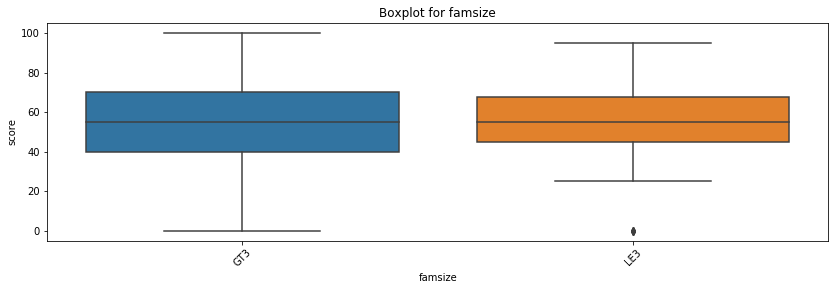

In [154]:
get_boxplot(students, 'famsize', 'score')

In [155]:
students.groupby('address').famsize.value_counts()

address  famsize
R        GT3         63
         LE3         20
U        GT3        197
         LE3         87
Name: famsize, dtype: int64

Как видно, в деревнях немного чаще встречаются большие семьи, чем в городах. Заполним famsize на основе этих данных.

In [156]:
def fill_fam_size_by_adrress(x):
    if isinstance(x.famsize, str):
        return x
    values = ['GT3', 'LE3']
    if x.address == 'R':
        x.famsize = np.random.choice(values, 1, p=[63/83, 20/83])[0]
    elif x.address =='U':
        x.famsize = np.random.choice(values, 1, p=[197/284, 87/284])[0]
    return x
    

In [157]:
students = students.apply(fill_fam_size_by_adrress, axis=1)

In [158]:
students.famsize.value_counts()

GT3    277
LE3    117
Name: famsize, dtype: int64

### Pstatus

In [159]:
students.Pstatus.value_counts(dropna=False)

T      313
NaN     45
A       36
Name: Pstatus, dtype: int64

Признак бинарный категориальный, с пропущенными значениями. На основании данных ниже можно заметить, что если образование матери
больше 9 классов, то вероятность жить раздельно повышается. Заполним пропуски на основании этого размышления. Для начала заполним пропуски в Medu медианой.

In [160]:
students.Medu.fillna(students.Medu.median(), inplace=True)

In [161]:
students.groupby('Medu').Pstatus.value_counts()

Medu  Pstatus
0.0   T            3
1.0   T           51
      A            1
2.0   T           84
      A            6
3.0   T           69
      A           14
4.0   T          106
      A           15
Name: Pstatus, dtype: int64

In [162]:
def fill_p_status_by_medu(x):
    if isinstance(x.Pstatus, str):
        return x
    if x.Medu > 2:
        x.Pstatus = np.random.choice(['T', 'A'], 1, p=[(69 + 106) / (69 + 14 + 106 + 15), 
                                                       (14 + 15) / (69 + 14 + 106 + 15)])[0]
    else:
        x.Pstatus = np.random.choice(['T', 'A'], 1, p=[(3 + 51 + 84) / (3 + 51 + 1 + 84 + 6),
                                                       (1 + 6) / (3 + 51 + 1 + 84 + 6)])[0]
    return x

In [163]:
students = students.apply(fill_p_status_by_medu, axis=1)

In [164]:
students.Pstatus.value_counts()

T    352
A     42
Name: Pstatus, dtype: int64

### Medu

In [165]:
students.Medu.value_counts(dropna=False)

4.0    131
2.0    102
3.0     99
1.0     59
0.0      3
Name: Medu, dtype: int64

Признак будем считать числовым, пропущенные значения были ранее заполнены медианой.

### Fedu

In [166]:
students.Fedu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      77
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

Признак будем считать числовым.
Видно, что здесь опечатка - значение 40.0. Поскольку значение медианы 2.5 не имеет смысла, заполним пропуски случайным значением
2 или 3.
#### Как вариант на подумать - заполнить 0 на случай, если студент стеснялся или у него нет отца

In [167]:
students.loc[students.Fedu == 40, 'Fedu'] = 4

In [168]:
students.Fedu = students.Fedu.apply(lambda x: x if not pd.isnull(x) else np.random.choice([2, 3], 1, p=[.5, .5])[0])

In [169]:
students.Fedu.value_counts(dropna=False)

2.0    116
3.0    110
4.0     89
1.0     77
0.0      2
Name: Fedu, dtype: int64

### Mjob

In [170]:
students.Mjob.value_counts(dropna=False)

other       133
services     97
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

Признак категориальный, пропуски заполним значением 'other'

In [171]:
students.Mjob.fillna('other', inplace=True)

In [172]:
students.Mjob.value_counts(dropna=False)

other       152
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

### Fjob

In [173]:
students.Fjob.value_counts(dropna=False)

other       197
services    101
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Признак категориальный, пропуски заполним значением 'other'

In [174]:
students.Fjob.fillna('other', inplace=True)
students.Fjob.value_counts()

other       233
services    101
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

### reason

In [175]:
students.reason.value_counts(dropna=False)

course        137
home          104
reputation    103
other          33
NaN            17
Name: reason, dtype: int64

Признак категориальный, пропуски заполним значением 'other'

In [176]:
students.reason.fillna('other', inplace=True)
students.reason.value_counts()

course        137
home          104
reputation    103
other          50
Name: reason, dtype: int64

### guardian

In [177]:
students.guardian.value_counts(dropna=False)

mother    249
father     86
NaN        31
other      28
Name: guardian, dtype: int64

Признак категориальный, пропуски заполним значением 'other'

In [178]:
students.guardian.fillna('other', inplace=True)
students.guardian.value_counts()

mother    249
father     86
other      59
Name: guardian, dtype: int64

### traveltime

In [179]:
students.traveltime.value_counts(dropna=False)

1.0    241
2.0     96
NaN     28
3.0     22
4.0      7
Name: traveltime, dtype: int64

Признак числовой, пропуски будем заполнять на основе переменной address

In [180]:
students.groupby('address').traveltime.mean()

address
R    1.841463
U    1.323944
Name: traveltime, dtype: float64

In [181]:
students.groupby('address').traveltime.value_counts()

address  traveltime
R        1.0            34
         2.0            31
         3.0            13
         4.0             4
U        1.0           207
         2.0            65
         3.0             9
         4.0             3
Name: traveltime, dtype: int64

In [182]:
def fill_traveltime_by_address(x):
    if not np.isnan(x.traveltime):
        return x
    if x.address == 'U':
        # Выберем случайное время путешествия на основе вероятностей для городского ученика
        x.traveltime = np.random.choice([1, 2, 3, 4], 1, p=[207/284, 65/284, 9/284, 3/284])[0]
    elif x.address =='R':
        # Аналогично для ученика из деревни
        x.traveltime = np.random.choice([1, 2, 3, 4], 1, p=[34/82, 31/82, 13/82, 4/82])[0]
    return x

In [183]:
students = students.apply(fill_traveltime_by_address, axis=1)
students.traveltime.value_counts(dropna=False)

1.0    256
2.0    104
3.0     26
4.0      8
Name: traveltime, dtype: int64

### studytime 

In [184]:
students.studytime.value_counts(dropna=False)

2.0    194
1.0    102
3.0     64
4.0     27
NaN      7
Name: studytime, dtype: int64

Признак будем считать числовым. Пропусков не много, целесообразно заполнить их медианой

In [185]:
students.studytime.fillna(students.studytime.median(), inplace=True)

In [186]:
students.studytime.value_counts(dropna=False)

2.0    201
1.0    102
3.0     64
4.0     27
Name: studytime, dtype: int64

### failures

In [187]:
students.failures.value_counts(dropna=False)

0.0    293
1.0     49
NaN     22
2.0     16
3.0     14
Name: failures, dtype: int64

Признак будем считать числовым. Допустим, что связь в романтических отношениях влияет на количество внеучебных неудач. Заполним его на основе признака romantic случайными величинами с определёнными вероятностями, соответствующими той или иной группе.

In [188]:
students.groupby('romantic').failures.mean()

romantic
no     0.292576
yes    0.422414
Name: failures, dtype: float64

In [189]:
students.groupby('romantic').failures.value_counts()

romantic  failures
no        0.0         187
          1.0          27
          3.0          10
          2.0           5
yes       0.0          84
          1.0          18
          2.0          11
          3.0           3
Name: failures, dtype: int64

In [190]:
def fill_failures_by_romantic(x):
    if np.isnan(x.failures):
        if isinstance(x.romantic, str):
            if x.romantic == 'yes':
                x.failures = np.random.choice([0, 1, 2, 3], 1, p=[84/116, 18/116, 11/116, 3/116])[0]
            elif x.romantic == 'no':
                x.failures = np.random.choice([0, 1, 2, 3], 1, p=[187/229, 27/229, 5/229, 10/229])[0]
        # если romantic не указано
        else:
            x.failures = np.random.choice([0, 1, 2, 3], 1, p=[293/372, 49/372, 16/372, 14/372])[0]
    return x

In [191]:
students = students.apply(fill_failures_by_romantic, axis=1)

In [192]:
students.romantic.value_counts(dropna=False)

no     240
yes    123
NaN     31
Name: romantic, dtype: int64

In [193]:
students.failures.value_counts(dropna=False)

0.0    310
1.0     52
2.0     18
3.0     14
Name: failures, dtype: int64

### schoolsup

In [194]:
students.schoolsup.value_counts(dropna=False)

no     334
yes     51
NaN      9
Name: schoolsup, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [195]:
students_check = students.dropna(subset = ['schoolsup'])
get_stat_diff(students_check, 'schoolsup', 'score')

Статистически значимые для schoolsup различия не найдены.


Оставим признак как есть, скорее всего он в итоговую модель не войдёт

### famsup

In [196]:
students.famsup.value_counts(dropna=False)

yes    219
no     136
NaN     39
Name: famsup, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [197]:
students_check = students.dropna(subset = ['famsup'])
get_stat_diff(students_check, 'famsup', 'score')

Статистически значимые для famsup различия не найдены.


Оставим признак как есть, скорее всего он в итоговую модель не войдёт

### paid

In [198]:
students.paid.value_counts(dropna=False)

no     199
yes    155
NaN     40
Name: paid, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [199]:
get_stat_diff(students, 'paid', 'score')

Статистически значимые для paid различия не найдены.


Оставим признак как есть, скорее всего он в итоговую модель не войдёт

### activities

In [200]:
students.activities.value_counts(dropna=False)

yes    195
no     185
NaN     14
Name: activities, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [201]:
students_check = students.dropna(subset = ['activities'])
get_stat_diff(students_check, 'activities', 'score')

Статистически значимые для activities различия не найдены.


Оставим признак как есть, скорее всего он в итоговую модель не войдёт

### nursery

In [202]:
students.nursery.value_counts(dropna=False)

yes    300
no      78
NaN     16
Name: nursery, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [203]:
students_check = students.dropna(subset = ['nursery'])
get_stat_diff(students_check, 'nursery', 'score')

Статистически значимые для nursery различия не найдены.


Оставим признак как есть, скорее всего он в итоговую модель не войдёт

### higher

In [204]:
students.higher.value_counts(dropna=False)

yes    356
NaN     20
no      18
Name: higher, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [205]:
students_check = students.dropna(subset = ['higher'])
get_stat_diff(students_check, 'higher', 'score')

Найдены статистически значимые различия для колонки higher


Имеет смысл заполнить пропущенные значения. Обычн если отец/мать имеют высшее образование, то они чаще мотивируют ребенка
его так же получить. Проверим гипотезу:

In [206]:
students.groupby('higher').Medu.mean()

higher
no     1.888889
yes    2.794944
Name: Medu, dtype: float64

In [207]:
students.groupby('higher').Medu.median()

higher
no     2.0
yes    3.0
Name: Medu, dtype: float64

Для простоты будем считать, что если образование матери не более 9 классов, то higher = no

In [208]:
def fill_higher_by_medu(x):
    if isinstance(x.higher, str):
        return x
    if x.Medu <= 2:
        x.higher = 'no'
    elif x.Medu > 2:
        x.higher = 'yes'
    return x

In [209]:
students = students.apply(fill_higher_by_medu, axis=1)

In [210]:
students.higher.value_counts()

yes    368
no      26
Name: higher, dtype: int64

### internet

In [211]:
students.internet.value_counts(dropna=False)

yes    304
no      56
NaN     34
Name: internet, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [212]:
students_check = students.dropna(subset = ['internet'])
get_stat_diff(students_check, 'internet', 'score')

Статистически значимые для internet различия не найдены.


Оставим признак как есть, скорее всего он в итоговую модель не войдёт

### romantic

In [213]:
students.romantic.value_counts(dropna=False)

no     240
yes    123
NaN     31
Name: romantic, dtype: int64

Признак бинарный категориальный. Посмотрим, имеет ли он статистическую значимость по тесту Стьюдента

In [214]:
students_check = students.dropna(subset = ['romantic'])
get_stat_diff(students_check, 'romantic', 'score')

Найдены статистически значимые различия для колонки romantic


Оказывается, романтические отношения сильно влияют на оценку по математике! Заполним пропущенные значения случайным образом на основе вероятности быть в отношениях на предыдущих данных

In [215]:
def fill_romantic(x):
    if isinstance(x.romantic, str):
        return x
    x.romantic = np.random.choice(['yes', 'no'], 1, p=[123/363, 240/363])[0]
    return x

In [216]:
students = students.apply(fill_romantic, axis=1)

In [217]:
students.romantic.value_counts()

no     260
yes    134
Name: romantic, dtype: int64

### famrel

In [218]:
students.famrel.value_counts(dropna=False)

 4.0    182
 5.0     98
 3.0     62
 NaN     27
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Признак количественный, с одним неверно заполненным значением и 27 отсутствующих. Заполним их медианой

In [219]:
students.loc[students.famrel == -1, 'famrel'] = students.famrel.median()
students.famrel.fillna(students.famrel.median(), inplace=True)

In [220]:
students.famrel.value_counts(dropna=False)

4.0    210
5.0     98
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

### freetime

In [221]:
students.freetime.value_counts(dropna=False)

3.0    153
4.0    111
2.0     63
5.0     38
1.0     18
NaN     11
Name: freetime, dtype: int64

Признак количественный, с 11 отсутствующих значениями. Заполним их медианой

In [222]:
students.freetime.fillna(students.freetime.median(), inplace=True)

In [223]:
students.freetime.value_counts(dropna=False)

3.0    164
4.0    111
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

### goout

In [224]:
students.goout.value_counts(dropna=False)

3.0    127
2.0    101
4.0     84
5.0     51
1.0     23
NaN      8
Name: goout, dtype: int64

Признак количественный, с 8 отсутствующих значениями. Заполним их медианой

In [225]:
students.goout.fillna(students.goout.median(), inplace=True)

In [226]:
students.goout.value_counts(dropna=False)

3.0    135
2.0    101
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

### health

In [227]:
students.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     63
1.0     46
2.0     43
NaN     15
Name: health, dtype: int64

Признак количественный, с 15 отсутствующих значениями. Заполним их медианой

In [228]:
students.health.fillna(students.health.median(), inplace=True)

In [229]:
students.health.value_counts(dropna=False)

5.0    138
3.0     89
4.0     78
1.0     46
2.0     43
Name: health, dtype: int64

### absences

In [230]:
students.absences.value_counts(dropna=False)

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
NaN       12
14.0      12
3.0        8
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Признак количественный, будем считать что при NaN пропущенных значений нет:

In [231]:
students.absences.fillna(0, inplace=True)

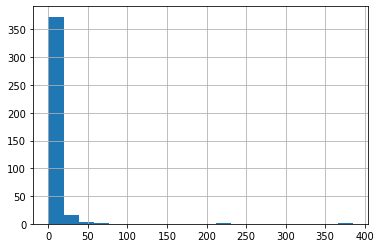

In [232]:
students.absences.hist(bins=20)

In [233]:
students.absences.isnull().sum()

0

Интуитивно гистограмма имеет выбросы, попробуем их устранить из исходного датасета:

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


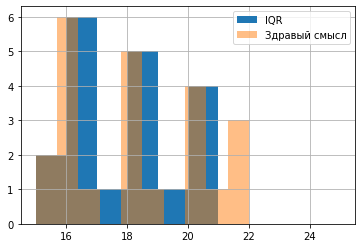

In [234]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10
                                                                                              , range = (15, 25), 
                                                                                             label = 'IQR')
students.absences.loc[students.absences <= 100].hist(alpha = 0.5, bins = 10, range = (15, 22),
                                                        label = 'Здравый смысл')
plt.legend();

In [235]:
students = subset_by_remove_outliers(students, 'absences')
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               377 non-null    object 
 1   sex                  377 non-null    object 
 2   age                  377 non-null    int64  
 3   address              377 non-null    object 
 4   famsize              377 non-null    object 
 5   Pstatus              377 non-null    object 
 6   Medu                 377 non-null    float64
 7   Fedu                 377 non-null    float64
 8   Mjob                 377 non-null    object 
 9   Fjob                 377 non-null    object 
 10  reason               377 non-null    object 
 11  guardian             377 non-null    object 
 12  traveltime           377 non-null    float64
 13  studytime            377 non-null    float64
 14  failures             377 non-null    float64
 15  schoolsup            368 non-null    obj

Итого удалили 18 записей

### studytime, granular

In [236]:
students['studytime, granular'].value_counts(dropna=False)

-6.0     183
-3.0      98
-9.0      62
-12.0     27
 NaN       7
Name: studytime, granular, dtype: int64

Признак будем считать количественным, заполним пропущенные значения медианой

In [237]:
students['studytime, granular'].fillna(students['studytime, granular'].median(), inplace=True)

In [238]:
students['studytime, granular'].value_counts(dropna=False)

-6.0     190
-3.0      98
-9.0      62
-12.0     27
Name: studytime, granular, dtype: int64

# Анализ влияния категориальных переменных

Список переменных, которые рассматриваются как категориальные:

In [239]:
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
              'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Оценим их статистическую значимость по тесту Стьюдента:

In [240]:
for col in categorical:
    get_stat_diff(students, col, 'score')

Статистически значимые для school различия не найдены.
Найдены статистически значимые различия для колонки sex
Статистически значимые для address различия не найдены.
Статистически значимые для famsize различия не найдены.
Статистически значимые для Pstatus различия не найдены.
Найдены статистически значимые различия для колонки Mjob
Статистически значимые для Fjob различия не найдены.
Статистически значимые для reason различия не найдены.
Статистически значимые для guardian различия не найдены.
Статистически значимые для schoolsup различия не найдены.
Статистически значимые для famsup различия не найдены.
Найдены статистически значимые различия для колонки paid
Статистически значимые для activities различия не найдены.
Статистически значимые для nursery различия не найдены.
Найдены статистически значимые различия для колонки higher
Статистически значимые для internet различия не найдены.
Найдены статистически значимые различия для колонки romantic


Удалим не значимые категориальные признаки

In [241]:
students = students.drop(['school', 'address', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'schoolsup',
                         'famsup', 'activities', 'nursery', 'internet'], axis=1)

In [242]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 394
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  377 non-null    object 
 1   age                  377 non-null    int64  
 2   Medu                 377 non-null    float64
 3   Fedu                 377 non-null    float64
 4   Mjob                 377 non-null    object 
 5   traveltime           377 non-null    float64
 6   studytime            377 non-null    float64
 7   failures             377 non-null    float64
 8   paid                 338 non-null    object 
 9   studytime, granular  377 non-null    float64
 10  higher               377 non-null    object 
 11  romantic             377 non-null    object 
 12  famrel               377 non-null    float64
 13  freetime             377 non-null    float64
 14  goout                377 non-null    float64
 15  health               377 non-null    flo

Как видим признак paid обрел статистическую значимость после всех преобразований. Заполним в нём пустые значения

In [243]:
students.paid.fillna('no', inplace=True)
students.paid.value_counts()

no     232
yes    145
Name: paid, dtype: int64

In [244]:
get_stat_diff(students, 'paid', 'score')

Найдены статистически значимые различия для колонки paid


Впоследствии предполагается заменить категориальные признаки методикой one-hot-encoding, либо преобразовать к числовым заменой один к одному

# Анализ влияния количественных переменных

In [245]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.185715,-0.164303,0.060582,0.003321,0.156998,-0.003321,0.043383,0.041976,0.133867,-0.041651,0.118910,-0.158100
Medu,-0.185715,1.000000,0.595764,-0.181124,0.096700,-0.247755,-0.096700,-0.020373,0.045253,0.053138,-0.046280,0.068600,0.214650
Fedu,-0.164303,0.595764,1.000000,-0.126832,0.014256,-0.257287,-0.014256,-0.019765,-0.012511,0.046813,0.016435,-0.021210,0.115910
traveltime,0.060582,-0.181124,-0.126832,1.000000,-0.093292,0.065344,0.093292,-0.050324,0.000437,0.015764,0.003960,-0.037240,-0.073686
studytime,0.003321,0.096700,0.014256,-0.093292,1.000000,-0.169290,-1.000000,0.028422,-0.128670,-0.033993,-0.086519,-0.064534,0.117274
failures,0.156998,-0.247755,-0.257287,0.065344,-0.169290,1.000000,0.169290,-0.004064,0.088874,0.084116,0.116080,0.046595,-0.319762
"studytime, granular",-0.003321,-0.096700,-0.014256,0.093292,-1.000000,0.169290,1.000000,-0.028422,0.128670,0.033993,0.086519,0.064534,-0.117274
famrel,0.043383,-0.020373,-0.019765,-0.050324,0.028422,-0.004064,-0.028422,1.000000,0.152924,0.058001,0.095618,-0.067800,0.062058
freetime,0.041976,0.045253,-0.012511,0.000437,-0.128670,0.088874,0.128670,0.152924,1.000000,0.276817,0.056804,0.079144,0.039709
goout,0.133867,0.053138,0.046813,0.015764,-0.033993,0.084116,0.033993,0.058001,0.276817,1.000000,0.003971,0.081667,-0.107419


Переменные Medu и Fedu достаточно хорошо скоррелированы, что позволяет сделать вывод о том, что в семье у родителей примерно одинаковое образование. 
Переменная studytime полностью обратно скоррелирована с studytime, granular, что позволяет одну из них удалить.

Для построения модели оставим только те данные, корреляция по модулю которых больше 0.1

In [246]:
students = students.drop(['traveltime', 'famrel', 'freetime', 'health', 'absences', 'studytime, granular'], axis=1)

In [247]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 394
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        377 non-null    object 
 1   age        377 non-null    int64  
 2   Medu       377 non-null    float64
 3   Fedu       377 non-null    float64
 4   Mjob       377 non-null    object 
 5   studytime  377 non-null    float64
 6   failures   377 non-null    float64
 7   paid       377 non-null    object 
 8   higher     377 non-null    object 
 9   romantic   377 non-null    object 
 10  goout      377 non-null    float64
 11  score      377 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 38.3+ KB


# Выводы

В результате EDA для анализа влияния различных параметров жизни ученика на итоговую оценку были получены следующие выводы:
    1. В данных достаточно много пустых значений. Почти все столбцы из итогового датасета были с пропущенными значениями, и были дополнены на основе функций от других столбцов.
    2. Выбросы в количественных переменных age, absences были найдены и устранены. Данные достаточно чистые, т.к. из итогового датасета было удалено 18 (4.5%) записей.
    3. Положительные корреляции score и Medu, Fedu, studytime говорит о том, что образование родителей и время, потраченное на учебу очень важны для итоговой оценки по предмету.
    4. Отрицательные корреляции score и Age, failures говорит о том, что чем старше ученик и чем больше у него внеучебных неудач, тем сложнее ему сдать математику. Возможно, оказывают влияние романтические отношения.
    5. Самые важные параметры, которые предлагается использовать в дальнейшем при построении модели это 'sex', 'age', 'Medu', 'Fedu', 'Mjob', 'traveltime', 'studytime', 'failures', 'paid', 'studytime, granular', 'higher', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score'. При этом предпологается преобразование категориальных признаков в бинарные методом one-hot-encoding и нормализация данных. Итоговый датасет после преобразования данных пропусков не содержит.